# 4. Data Preparation

Data will be prepared before modelling. 

In [56]:
#Import train and test data CSV for prediction 
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

In [57]:
train_data.shape

(2051, 81)

In [58]:
test_data.shape

(878, 80)

In [59]:
test_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [60]:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

# 4.1 Clean and transform data, feature engineering

In [61]:
remove_row = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', \
              'Garage Cars', 'Garage Area']

drop_col = ['Lot Frontage','PID', 'Mo Sold', 'Garage Yr Blt', 'Year Remod/Add', 'Year Built', 'Garage Cars',\
           'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Sale Type']
#reasons for dropping columns 
# Year Built & 'Garage Yr Blt': New variable created - "House Age"
# Year Remod/Add: New variable created - "Age Remod"
# Garage Cars: Similar correlation to Garage Area
# Bsmt Variables: New variable created - Total SF
#Sale Type: Not a feature of the house


input_0 = ['Mas Vnr Area'] 
input_na = ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', \
              'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC',\
          'Fence', 'Misc Feature']

In [62]:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [63]:
#Training Data cleaning 

#drop rows
train_data.dropna(subset=remove_row, inplace=True)

#Input 0 
train_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[train_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
train_data["House Age"] = train_data["Yr Sold"] - train_data["Year Built"]
train_data["Total SF"] = (train_data["Total Bsmt SF"] + train_data["1st Flr SF"] + train_data["2nd Flr SF"]) 

#Remove outliers
train_data.drop(train_data.loc[train_data['Gr Liv Area']>5000].index, inplace=True)
train_data.drop(train_data.loc[train_data['Total SF']>10000].index, inplace=True)

#drop columns 
train_data = train_data[train_data.columns[~train_data.columns.isin(drop_col)]]

In [64]:
#Test data cleaning
#The test data will also be cleaned as well but the outliers and rows will not be removed as 
#Kaggle submission requires a certain number of rows for submission

#Input 0 
test_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[test_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
test_data["House Age"] = test_data["Yr Sold"] - test_data["Year Built"]
test_data["Total SF"] = (test_data["Total Bsmt SF"] + test_data["1st Flr SF"] + test_data["2nd Flr SF"]) 

#drop columns 
test_data = test_data[test_data.columns[~test_data.columns.isin(drop_col)]]

In [65]:
test_data.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed

In [66]:
print(test_data.shape, train_data.shape)

(878, 71) (2046, 72)


In [67]:
#Saleprice is in training data, but not in the test data
[col for col in train_data.columns if col not in test_data.columns]

['SalePrice']

# 4.2  One-hot encoding

Categorical variables will be hot-encoded

In [68]:
categorical_cols = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature']

In [69]:
#one-hot encoding categorical features of a house 
train_dummies = pd.get_dummies(train_data, columns = categorical_cols)
test_dummies = pd.get_dummies(test_data, columns = categorical_cols)

# 4.3 Drop features with little variance 

Features with low variance will be removed for dimensionality reduction as a feature with low variance cannot explain much of the variance in SalePrice

In [70]:
low_variance = train_dummies.var().sort_values(ascending=False)
low_variance = low_variance[low_variance.values < 0.002]

In [71]:
low_variance.index

Index(['Roof Matl_WdShake', 'Misc Feature_Gar2', 'Heating QC_Po',
       'Condition 2_PosN', 'Misc Feature_Othr', 'Exterior 2nd_AsphShn',
       'Condition 1_RRNe', 'Exterior 1st_BrkComm', 'Roof Style_Shed',
       'Pool QC_Gd', 'Garage Qual_Ex', 'Neighborhood_Greens',
       'Condition 2_PosA', 'Bsmt Cond_Ex', 'MS Zoning_A (agr)',
       'Utilities_AllPub', 'Pool QC_Fa', 'Foundation_Wood', 'Heating_OthW',
       'Exterior 1st_Stone', 'Exterior 1st_CBlock', 'Condition 2_RRNn',
       'Exter Cond_Po', 'Garage Cond_Ex', 'Functional_Sal', 'Garage Qual_Po',
       'Neighborhood_GrnHill', 'Functional_Sev', 'Pool QC_TA',
       'Exterior 2nd_CBlock', 'Utilities_NoSeWa', 'Utilities_NoSewr',
       'Exterior 1st_ImStucc', 'Pool QC_Ex', 'Bsmt Qual_Po',
       'Neighborhood_Landmrk', 'Exterior 1st_AsphShn', 'Roof Matl_Membran',
       'MS Zoning_I (all)', 'Condition 2_RRAn', 'Condition 2_RRAe',
       'Electrical_Mix', 'Misc Feature_TenC'],
      dtype='object')

In [72]:
#4 columns will be dropped
len(low_variance)

43

In [73]:
#columns with low varaiance dropped
train_dummmies = train_dummies.drop(columns = low_variance.index)

In [74]:
#Align final_train and final_test
final_train, final_test = train_dummies.align(test_dummies, join='left', axis=1)

In [75]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 287)


In [76]:
# drop sale price from final_test
final_test = final_test.drop(columns = 'SalePrice')

In [77]:
# fill null dummy variables
final_test = final_test.fillna(0)

In [78]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 286)


## Save final dataframes as CSV files 

In [79]:
# Save final training data
final_train.to_csv('./final_dataset/final_train.csv', index=False)

# Save final test data
final_test.to_csv('./final_dataset/final_test.csv', index=False)

# 5. Modelling

In [81]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics

sns.set_style()

pd.set_option('display.max_columns', None)

%matplotlib inline

In [82]:

#Import train and test data CSV for prediction 
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")   


# 5.1 Baseline Prediction 
Before working on the models, I tried using the predicions based on the average sale price of the listings in the train_data file. The average sale price is `$181493`. Using this average sale price, I submitted this prediction into Kaggle and the RMSE score it produced was `83945.99`. 

Using the Kaggle RMSE of `83945.99`, we will be able to utilise it while we are creating the regression models. The aim will be to minimize the RMSE as much as possible. The smaller the RMSE, the better our model predictions.

In [83]:
#average sale price 
train_data['SalePrice'].mean()

181469.70160897123

# 5.2 Train Test Split Training Data

In [84]:
X = final_train.drop(columns = 'SalePrice')
y = final_train[['SalePrice']]

print(X.shape)
print(y.shape)

# train test split
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)   

(2046, 286)
(2046, 1)
(1636, 286)
(1636, 1)
(410, 286)
(410, 1)


In [85]:
test_df = pd.read_csv('./final_dataset/final_test.csv')

# 5.3 StandardScaler, fit, and transform

Scaling data for regularised regression

In [86]:
ss = StandardScaler()

In [87]:
ss.fit(X_train)

StandardScaler()

In [88]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
X_sub = ss.transform(test_df)

In [89]:
X_train_sc.shape

(1636, 286)

In [90]:
X_test_sc.shape

(410, 286)

In [91]:
X_sub.shape

(878, 286)

In [92]:
#Instantiate
lr = LinearRegression()
ridge = Ridge()
ridgecv = RidgeCV()
lassocv = LassoCV()
en = ElasticNetCV()

# 5.4 Linear Regression 

In [93]:
#fit
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
lr.score(X_test, y_test)

0.9181190187227168

In [95]:
# Generate predictions
y_pred_lr_train = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lr_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lr_train))
print('\n')
# Testing on test data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lr))

Training Set
Predicted Train RMSE: 19119.711576378388
Predicted Train r2: 0.9421784977403324


Test Set
Predicted Test RMSE: 22387.652434986456
Predicted Test r2: 0.9181190187227168


In [96]:
lr_predictions = pd.DataFrame(lr.predict(test_df))
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.9067919451399458

In [97]:

# Generate csv
lr_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lr_predictions[0]})

lr_submission.to_csv('./final_dataset/lr_submission.csv', index=False)

The linear regression test results are performing worse than the training set.

__Kaggle RMSE Score = 26319.84916__

# 5.5 Ridge CV

In [98]:

r_alpha = np.logspace(0,5,100)

# Instantiate model.
ridgecv = RidgeCV(alphas = r_alpha, cv= 5)

In [99]:
#fit
ridgecv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [100]:
# Generate predictions
y_pred_ridgecv_train = ridgecv.predict(X_train_sc)
y_pred_ridgecv = ridgecv.predict(X_test_sc)

# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_ridgecv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_ridgecv_train))
print('\n')
# Testing on test data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridgecv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_ridgecv))

Training Set
Predicted Train RMSE: 19610.955922862628
Predicted Train r2: 0.9391691023954134


Test Set
Predicted Test RMSE: 21773.302787446337
Predicted Test r2: 0.9225512253531988


In [101]:
ridge_predictions = pd.DataFrame(ridgecv.predict(X_sub))
cross_val_score(ridgecv, X_train_sc, y_train, cv=5).mean()

0.9146078820484977

In [102]:

# Generate csv
ridge_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': ridge_predictions[0]})

ridge_submission.to_csv('./final_dataset/ridge_submission.csv', index=False)

In [103]:
#ridge_predictions

The  test results are performing worse than the training set.

__Kaggle RMSE Score = 26518.07449__

# 5.6 Lasso CV

In [104]:
#Instantiate model
lassocv = LassoCV()
# Fit model using optimal alpha.
lassocv.fit(X_train_sc, y_train)


LassoCV()

In [105]:
# Here is the optimal value of alpha which will be used in the model tuning 
lassocv.alpha_

379.2137113196995

In [106]:
cv=RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
#r2

#abs
abs(cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean())

22369.137537163177

In [107]:
# Generate predictions
y_pred_lassocv_train = lassocv.predict(X_train_sc)
y_pred_lassocv = lassocv.predict(X_test_sc)

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lassocv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lassocv_train))
print('\n')
# Testing on unseen data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lassocv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lassocv))

Training Set
Predicted Train RMSE: 19929.564862935375
Predicted Train r2: 0.9371764706700595


Test Set
Predicted Test RMSE: 21320.51410837086
Predicted Test r2: 0.9257389180588734


In [108]:
lasso_predictions = pd.DataFrame(lassocv.predict(X_sub))

In [109]:

# Generate csv
lasso_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lasso_predictions[0]})

lasso_submission.to_csv('./final_dataset/lasso_submission.csv', index=False)

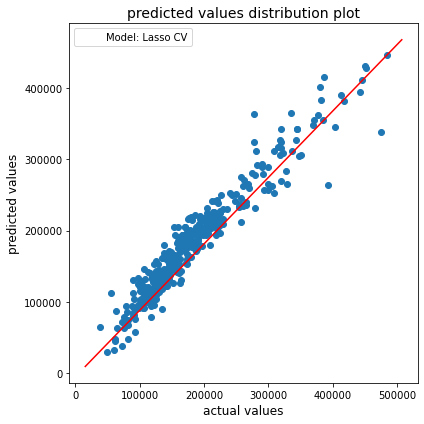

In [110]:
# plot ypred vs ytrue
fig, ax = plt.subplots(figsize=(6.0, 6.0))
ax.scatter(y_test['SalePrice'], y_pred_lassocv)
ax.set_title('predicted values distribution plot',fontsize=14)
ax.set_xlabel('actual values',fontsize=12)
ax.set_ylabel('predicted values',fontsize=12)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c="r")
plt.plot([], [], ' ', label="Model: Lasso CV")
plt.legend()
plt.tight_layout()

__Kaggle RMSE score : 25538.77144__



# 5.7 Elastic Net

In [111]:
#instantiate model
en.fit(X_train_sc, y_train)

ElasticNetCV()

In [112]:
# Generate predictions
y_pred_en_train = en.predict(X_train_sc)
y_pred_en = en.predict(X_test_sc)

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_en_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_en_train))
print('\n')
# Testing on unseen data|
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_en)))
print('Predicted Test r2:', r2_score(y_test, y_pred_en))

Training Set
Predicted Train RMSE: 67466.59700829863
Predicted Train r2: 0.2800467313534941


Test Set
Predicted Test RMSE: 66495.1406388333
Predicted Test r2: 0.27765321425528044


In [113]:
en_predictions = pd.DataFrame(en.predict(X_sub))
cross_val_score(en, X_train_sc, y_train, cv=5).mean()

0.2741459351907925

In [114]:
# Generate csv
en_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': en_predictions[0]})

en_submission.to_csv('./final_dataset/en_submission.csv', index=False)

__Kaggle RMSE Score: 72604.75605__

## Overall Conclusion for initial modelling 

The Lasso Regression Model was the best model to test my training data because it was able to manage well unknown data according to the 𝑅2 score. The scatter plot of the predicted saleprice and actual sale price has a generally strong linear relationship except for two outliers.

# 6. Improving Model

## 6.1 Improving the model by tuning the hyperparameters

In [115]:
#Changing the alpha and max_iter
#Instantiate model
lassocv = LassoCV(n_alphas = 369, max_iter=70)
lassocv.fit(X_train_sc, y_train)

LassoCV(max_iter=70, n_alphas=369)

In [116]:
#optimal alpha
lassocv.alpha_

372.65613404868975

In [117]:
# Generate predictions
y_pred_lassocv_train = lassocv.predict(X_train_sc)
y_pred_lassocv = lassocv.predict(X_test_sc)

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lassocv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lassocv_train))
print('\n')
# Testing on unseen data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lassocv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lassocv))

Training Set
Predicted Train RMSE: 19905.000554224174
Predicted Train r2: 0.9373312422898937


Test Set
Predicted Test RMSE: 21317.637831096472
Predicted Test r2: 0.9257589533219593


In [118]:
cv=RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
#r2

#abs
abs(cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean())

22369.093285156716

In [119]:
lasso_predictions = pd.DataFrame(lassocv.predict(X_sub))

In [120]:
# Generate csv
lasso_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lasso_predictions[0]})

lasso_submission.to_csv('./final_dataset/lasso_pt1_submission.csv', index=False)

__Kaggle RMSE score : 25421.58717__

## Improving model through feature selection 
Relooking the Lasso model to view the most important features 

In [121]:
#coefficients of features in the lasso model
coef= sorted(abs(lassocv.coef_), reverse = True)

Text(0.5, 1.0, 'Top 25 Housing Features')

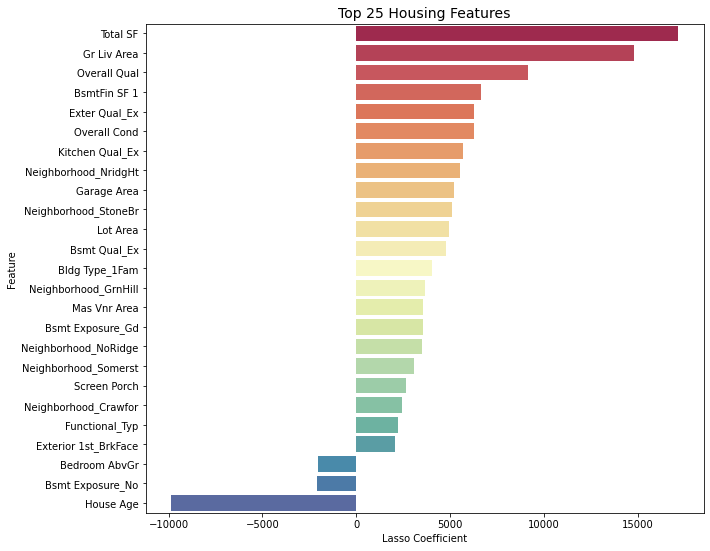

In [122]:
# Create dataframe of features, coefficients and absolute coefficients
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lassocv.coef_)
lasso_df['Coef'] = lassocv.coef_
lasso_df['Feature'] = X.columns

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(10,9))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(25)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_yticklabels(data['Feature'])
ax.set_xlabel('Lasso Coefficient')
plt.title('Top 25 Housing Features', fontsize=14)


In [123]:
top_25 = ["Total SF", "Gr Liv Area", "Overall Qual", "BsmtFin SF 1", "Overall Cond", "Exter Qual_Ex",\
          "Neighborhood_NridgHt", "Kitchen Qual_Ex", "Neighborhood_StoneBr", "Lot Area", "Garage Area",\
          "Bldg Type_1Fam", "Bsmt Qual_Ex", "Neighborhood_GrnHill", "Mas Vnr Area", "Neighborhood_Somerst",\
         "Bsmt Exposure_Gd", "Bsmt Exposure_No" ,"Neighborhood_NoRidge", "Screen Porch", "Neighborhood_Crawfor", \
          "Exterior 1st_BrkFace","Functional_Typ", "Bedroom AbvGr", "House Age"]


### After viewing the top 25 features, I will try to recreate a model with just the top 25 features highlighted. Afterwhich, I will  rerun the model for the RMSE score on Kaggle. 

I will be going through the entire process again before running the data. 

1) loading data 

2) data cleaning 

3) one - hot encoding 

4) removing features with low variance 

5) train test split 

6) feature scaling 

7) lasso cv modelling 

In [124]:
#Import train and test data CSV for prediction 
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")                                                      

In [125]:
train_data.shape

(2051, 81)

In [126]:
test_data.shape

(878, 80)

In [127]:
#Training Data cleaning 

#drop rows
train_data.dropna(subset=remove_row, inplace=True)

#Input 0 
train_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[train_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
train_data["House Age"] = train_data["Yr Sold"] - train_data["Year Built"]
train_data["Total SF"] = (train_data["Total Bsmt SF"] + train_data["1st Flr SF"] + train_data["2nd Flr SF"]) 

#Remove outliers
train_data.drop(train_data.loc[train_data['Gr Liv Area']>5000].index, inplace=True)
train_data.drop(train_data.loc[train_data['Total SF']>10000].index, inplace=True)

#drop columns 
train_data = train_data[train_data.columns[~train_data.columns.isin(drop_col)]]

In [128]:
#Test data cleaning
#The test data will also be cleaned as well but the outliers and rows will not be removed as 
#Kaggle submission requires a certain number of rows for submission

#Input 0 
test_data['Mas Vnr Area'] .fillna( 0, inplace = True) 

#Input None
[test_data[col].fillna( 'None', inplace = True) for col in input_na]

#Add new columns 
test_data["House Age"] = test_data["Yr Sold"] - test_data["Year Built"]
test_data["Total SF"] = (test_data["Total Bsmt SF"] + test_data["1st Flr SF"] + test_data["2nd Flr SF"]) 

#drop columns 
test_data = test_data[test_data.columns[~test_data.columns.isin(drop_col)]]

In [129]:
print(test_data.shape, train_data.shape)

(878, 71) (2046, 72)


In [130]:
categorical_cols = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature']

In [131]:
#one-hot encoding 
train_dummies = pd.get_dummies(train_data, columns = categorical_cols)
test_dummies = pd.get_dummies(test_data, columns = categorical_cols)

In [132]:
#removing features with low variance 
low_variance = train_dummies.var().sort_values(ascending=False)
low_variance = low_variance[low_variance.values < 0.002]

In [133]:
low_variance.index

Index(['Roof Matl_WdShake', 'Misc Feature_Gar2', 'Heating QC_Po',
       'Condition 2_PosN', 'Misc Feature_Othr', 'Exterior 2nd_AsphShn',
       'Condition 1_RRNe', 'Exterior 1st_BrkComm', 'Roof Style_Shed',
       'Pool QC_Gd', 'Garage Qual_Ex', 'Neighborhood_Greens',
       'Condition 2_PosA', 'Bsmt Cond_Ex', 'MS Zoning_A (agr)',
       'Utilities_AllPub', 'Pool QC_Fa', 'Foundation_Wood', 'Heating_OthW',
       'Exterior 1st_Stone', 'Exterior 1st_CBlock', 'Condition 2_RRNn',
       'Exter Cond_Po', 'Garage Cond_Ex', 'Functional_Sal', 'Garage Qual_Po',
       'Neighborhood_GrnHill', 'Functional_Sev', 'Pool QC_TA',
       'Exterior 2nd_CBlock', 'Utilities_NoSeWa', 'Utilities_NoSewr',
       'Exterior 1st_ImStucc', 'Pool QC_Ex', 'Bsmt Qual_Po',
       'Neighborhood_Landmrk', 'Exterior 1st_AsphShn', 'Roof Matl_Membran',
       'MS Zoning_I (all)', 'Condition 2_RRAn', 'Condition 2_RRAe',
       'Electrical_Mix', 'Misc Feature_TenC'],
      dtype='object')

In [134]:
#43 columns will be dropped
len(low_variance)

43

In [135]:
#columns with low varaiance dropped
train_dummmies = train_dummies.drop(columns = low_variance.index)

In [136]:
#Align final_train and final_test
final_train, final_test = train_dummies.align(test_dummies, join='left', axis=1)

In [137]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 287)


In [138]:
# drop sale price from final_test
final_test = final_test.drop(columns = 'SalePrice')

In [139]:
# fill null dummy variables
final_test = final_test.fillna(0)


In [140]:
print(final_train.shape, final_test.shape)

(2046, 287) (878, 286)


In [141]:
#train dataset includes saleprice

top_25_train = ["Total SF", "Gr Liv Area", "Overall Qual", "BsmtFin SF 1", "Overall Cond", "Exter Qual_Ex",\
          "Neighborhood_NridgHt", "Kitchen Qual_Ex", "Neighborhood_StoneBr", "Lot Area", "Garage Area",\
          "Bldg Type_1Fam", "Bsmt Qual_Ex", "Neighborhood_GrnHill", "Mas Vnr Area", "Neighborhood_Somerst",\
         "Bsmt Exposure_Gd", "Bsmt Exposure_No" ,"Neighborhood_NoRidge", "Screen Porch", "Neighborhood_Crawfor", \
          "Exterior 1st_BrkFace","Functional_Typ", "Bedroom AbvGr", "House Age", "SalePrice"]

top_25_test = ["Total SF", "Gr Liv Area", "Overall Qual", "BsmtFin SF 1", "Overall Cond", "Exter Qual_Ex",\
          "Neighborhood_NridgHt", "Kitchen Qual_Ex", "Neighborhood_StoneBr", "Lot Area", "Garage Area",\
          "Bldg Type_1Fam", "Bsmt Qual_Ex", "Neighborhood_GrnHill", "Mas Vnr Area", "Neighborhood_Somerst",\
         "Bsmt Exposure_Gd", "Bsmt Exposure_No" ,"Neighborhood_NoRidge", "Screen Porch", "Neighborhood_Crawfor", \
          "Exterior 1st_BrkFace","Functional_Typ", "Bedroom AbvGr", "House Age"]


In [142]:
final_train = final_train[top_25_train]

In [143]:
final_test = final_test[top_25_test]

In [144]:
print(final_train.shape, final_test.shape)

(2046, 26) (878, 25)


In [145]:
#train-test-split, test size(0.2)
X = final_train.drop(columns = 'SalePrice')
y = final_train[['SalePrice']]

print(X.shape)
print(y.shape)

# train test split
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)   

(2046, 25)
(2046, 1)
(1636, 25)
(1636, 1)
(410, 25)
(410, 1)


In [146]:
test_df=final_test.copy()
test_df.shape

(878, 25)

In [147]:
#Create the standardization scaling object
ss = StandardScaler()

#Fit the standardization parameters and scale the data.
ss.fit(X_train)

StandardScaler()

In [148]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
X_sub = ss.transform(test_df)

In [149]:
print(X_train_sc.shape, X_test_sc.shape, X_sub.shape)

(1636, 25) (410, 25) (878, 25)


In [150]:
# Lasso CV 
lassocv = LassoCV(n_alphas = 66, max_iter = 100)
# Fit model using optimal alpha.
lassocv.fit(X_train_sc, y_train)

LassoCV(max_iter=100, n_alphas=66)

In [151]:
#optimasl alpha
lassocv.alpha_

66.26867302034901

In [152]:
# Generate predictions
y_pred_lassocv_train = lassocv.predict(X_train_sc)
y_pred_lassocv = lassocv.predict(X_test_sc)


In [153]:

## Evaulation metrics: Root Mean Squared Error (RMSE), R-squared (r2)
# Testing on training data
print("Training Set")
print('Predicted Train RMSE:', np.sqrt(mean_squared_error(y_train,y_pred_lassocv_train)))
print('Predicted Train r2:', r2_score(y_train, y_pred_lassocv_train))
print('\n')
# Testing on unseen data
print("Test Set")
print('Predicted Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lassocv)))
print('Predicted Test r2:', r2_score(y_test, y_pred_lassocv))

Training Set
Predicted Train RMSE: 22210.907525198454
Predicted Train r2: 0.9219704134831815


Test Set
Predicted Test RMSE: 21554.335734756456
Predicted Test r2: 0.9241011469114538


In [154]:
cv=RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
#r2

#abs
abs(cross_val_score(lassocv, X_train_sc, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean())

22738.657924812112

In [155]:
lasso_predictions = pd.DataFrame(lassocv.predict(X_sub))


# Generate csv
lasso_submission = pd.DataFrame({'Id': test_data['Id'],
                           'SalePrice': lasso_predictions[0]})

lasso_submission.to_csv('./final_dataset/lasso_submission_imprved.csv', index=False)



__Kaggle RMSE score : 25861.19202__


# 6 Conclusions and Recommendations

### Four different models were tested on training data:

1) linear regression

2) Ridge CV

3) lasso CV

4) elastic net regression


Looking at the Kaggle score of the different models, we can see that the RMSE score is lowest for Lasso. The lowest score was produced by playing around with the max_iter and alpha. By setting the alpha to 200 and the max_iter to 30000, I was able to come up with the lowest Kaggle RMSE score. 

Improvements were made to improve the model in two areas. 

1) Hyperparameter tuning  

Improved the model by selecting the best configurations of the hyperparameters that give us the best model performance output. 

2) Feature Selection 

After determining the important features in the LassoCV model, I decided to run another model with just the important features identified in the initial model, discarding the other features to see if there was an improvement in the results. 


After rerunning the model, it was noticed that the LassoCV results improved after hyperparameter tuning with a R2 of 0.93.This model will be used to predict the housing prices in Ames based on the characteristics of the house. This model will support out in-house real estate agents support the clients (buyers & sellers) by looking at the key factors affecting housing prices in areas of Area, Condition/Quality, Building Type, External Feature and Location. With better pricing estimates, the real estate agents can advice buys on the estimate selling price and how they are able to improve their property features to push for a higher selling price. Furthermore for buyers, real estate agents will be able to work with buyers in determining the fair value of a house price in relation to the features of the house. 

###  Recommendations

More time will be required to drop more features to improve the model, testing across other machine learning models before the solution will be able to be released for implementation to help the real estate agents in predicting the Sale Prices depending on the features of the house. If the model is continually worked on, collecting more data from different cities within the USA with a longer time frame, this dataset will serve more purpose beyond Iowa, benefitting more individuals and also showing more valuable trends between housing prices in different cities. Furthermore, there are also some limitations with the model as the model currently only considers the features of the property only, it does not take into account other factors including econommic indicators, government policies, mortgage and interest rates. 



